In [1]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=6e38de4a8ab20da476cb5a8d2f53496c19b9e59740f5d1732888923b1aa06c88
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [5]:
from pyspark.sql import SparkSession
from pyspark import StorageLevel

In [4]:
spark = SparkSession.builder \
    .appName("app_name") \
    .getOrCreate()

In [ ]:
spark.sql('CREATE DATABASE desp')
spark.sql('USE desp')

In [6]:
despachantes = spark.read.csv('/content/despachantes.csv', header=True, inferSchema=True, sep=',')

In [7]:
despachantes.show()

+---+-------------------+-----+-------------+---+-------------------+
|  1|   Carminda Pestana|Ativo|  Santa Maria| 23|         2020-08-11|
+---+-------------------+-----+-------------+---+-------------------+
|  2|    Deolinda Vilela|Ativo|Novo Hamburgo| 34|2020-03-05 00:00:00|
|  3|   Emídio Dornelles|Ativo| Porto Alegre| 34|2020-02-05 00:00:00|
|  4|Felisbela Dornelles|Ativo| Porto Alegre| 36|2020-02-05 00:00:00|
|  5|     Graça Ornellas|Ativo| Porto Alegre| 12|2020-02-05 00:00:00|
|  6|   Matilde Rebouças|Ativo| Porto Alegre| 22|2019-01-05 00:00:00|
|  7|    Noêmia   Orriça|Ativo|  Santa Maria| 45|2019-10-05 00:00:00|
|  8|      Roque Vásquez|Ativo| Porto Alegre| 65|2020-03-05 00:00:00|
|  9|      Uriel Queiroz|Ativo| Porto Alegre| 54|2018-05-05 00:00:00|
| 10|   Viviana Sequeira|Ativo| Porto Alegre|  0|2020-09-05 00:00:00|
+---+-------------------+-----+-------------+---+-------------------+



In [8]:
despachantes.write.saveAsTable('despachantes')

In [9]:
df = spark.sql('SELECT * FROM despachantes')

In [10]:
df.show(2)

+---+----------------+-----+-------------+---+-------------------+
|  1|Carminda Pestana|Ativo|  Santa Maria| 23|         2020-08-11|
+---+----------------+-----+-------------+---+-------------------+
|  2| Deolinda Vilela|Ativo|Novo Hamburgo| 34|2020-03-05 00:00:00|
|  3|Emídio Dornelles|Ativo| Porto Alegre| 34|2020-02-05 00:00:00|
+---+----------------+-----+-------------+---+-------------------+
only showing top 2 rows



In [12]:
# Como ver o storage level de um objeto?
df.storageLevel

StorageLevel(False, False, False, False, 1)

### Cada argumento dentro de StorageLevel significa:
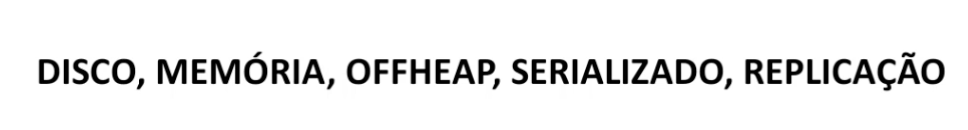

In [13]:
df.cache()

DataFrame[1: int, Carminda Pestana: string, Ativo: string, Santa Maria: string, 23: int, 2020-08-11: timestamp]

In [14]:
df.storageLevel

StorageLevel(True, True, False, True, 1)

In [15]:
df.persist(StorageLevel.DISK_ONLY)

DataFrame[1: int, Carminda Pestana: string, Ativo: string, Santa Maria: string, 23: int, 2020-08-11: timestamp]

In [17]:
# Retira do cache
df.unpersist()

DataFrame[1: int, Carminda Pestana: string, Ativo: string, Santa Maria: string, 23: int, 2020-08-11: timestamp]

In [18]:
# Definindo Storage Level como Disk Only
df.persist(StorageLevel.DISK_ONLY)

DataFrame[1: int, Carminda Pestana: string, Ativo: string, Santa Maria: string, 23: int, 2020-08-11: timestamp]

In [19]:
df.storageLevel

StorageLevel(True, False, False, False, 1)